In [1]:
population_size = 20
num_new_charging_points = 5
selection_size = 5

# Bounds of the search space
X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = -15, 15

In [2]:
import random

def generate_random_coordinates(n):
    coordinates = [(random.uniform(X_MIN, X_MAX), random.uniform(Y_MIN, Y_MAX)) for _ in range(n)]
    return coordinates

In [3]:
existing_charging_points = generate_random_coordinates(5)
points_of_interest = generate_random_coordinates(10)

print(existing_charging_points)
print(points_of_interest)

[(9.402006486967117, -9.142785663833013), (2.1841477997498444, -11.836056912760537), (-6.051409076510392, 12.166588353936298), (2.181393350066383, 13.683884872179895), (-0.29580710446644076, 1.8722707705488695)]
[(13.124068906165935, 10.67342886854491), (5.857878180497416, -13.649508973405617), (-8.23551116981812, -3.5326435855684117), (13.34453724891554, 4.072463609937827), (-6.063692503823862, 3.8650299071251055), (-13.333480777696572, 14.80928534429108), (-13.52537996276195, -5.831531876328853), (-2.9631985670503784, 3.341208568229913), (-4.43691270331486, 8.836316606828102), (-9.469557969586964, 1.7465701063272192)]


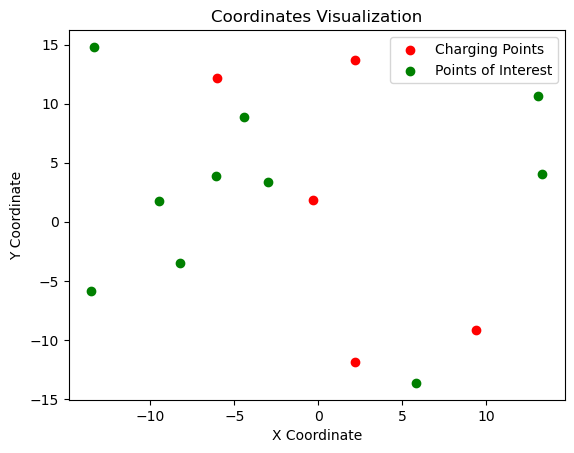

In [4]:
import matplotlib.pyplot as plt

# Separate x and y coordinates for charging points and points of interest
charging_x, charging_y = zip(*existing_charging_points)
interest_x, interest_y = zip(*points_of_interest)

# Plotting charging points in red and points of interest in green
plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')

# Set axis labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinates Visualization')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [53]:
def divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, factor_power, save_grids=False, numbering=False):
    total_parts = 2 ** num_of_qubits_for_one_point

    if numbering:
        print(f"Graph #: {factor_power}")

    # Find two factors of total_parts
    if num_of_qubits_for_one_point >= 3:
        factor1 = 2 ** factor_power
        factor2 = total_parts // factor1

        # Separate x and y coordinates for charging points and points of interest
        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)

        # Plotting charging points in red and points of interest in green
        plt.scatter(charging_x, charging_y, color='red', alpha=0.7)
        plt.scatter(interest_x, interest_y, color='green', alpha=0.7)

        # Set the axis limits to cover the entire range of X and Y coordinates
        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    # Save boundaries in the dictionary
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if i > 0:
                        adjacent_pairs.append((i - 1) * factor2 + j)
                    if i < factor1 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + j)
                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))
                    if i > 0 and j > 0:
                        adjacent_pairs.append((i - 1) * factor2 + (j - 1))
                    if i > 0 and j < factor2 - 1:
                        adjacent_pairs.append((i - 1) * factor2 + (j + 1))
                    if i < factor1 - 1 and j > 0:
                        adjacent_pairs.append((i + 1) * factor2 + (j - 1))
                    if i < factor1 - 1 and j < factor2 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + (j + 1))

                    adjacent_pairs.sort()

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts using {factor1} x {factor2} grid')

        plt.show()

    else:
        factor1, factor2 = 1, total_parts

        plt.scatter(*zip(*all_coordinates), color='blue', alpha=0.7)

        # Set the axis limits to cover the entire range of X and Y coordinates
        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    # Save boundaries in the dictionary
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts')

        plt.show()

    return boundaries_dict


In [54]:
from prettytable import PrettyTable

def display_boundaries_table(boundaries_dict, points_counts):
    if boundaries_dict is not None:
        table = PrettyTable()
        table.field_names = ["Grid Number", "X Start", "X End", "Y Start", "Y End", "Adjacent Pairs", "Existing Charging Points", "Points of Interest"]

        for grid_number, boundary_info in boundaries_dict.items():
            charging_points = points_counts[grid_number]['charging_points']
            points_of_interest = points_counts[grid_number]['points_of_interest']
            adjacent_pairs = ', '.join(map(str, boundary_info.get('adjacent_pairs', [])))

            table.add_row([grid_number, boundary_info['x_start'], boundary_info['x_end'], boundary_info['y_start'], boundary_info['y_end'],
                           adjacent_pairs, charging_points, points_of_interest])

        print(table)
    else:
        print("No grid boundaries to display.")


def count_points_in_grids(existing_charging_points, points_of_interest, boundaries_dict):
    grid_counts = {}

    for grid_number, boundaries in boundaries_dict.items():
        x_start, x_end, y_start, y_end = boundaries['x_start'], boundaries['x_end'], boundaries['y_start'], boundaries['y_end']

        charging_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in existing_charging_points)
        interest_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in points_of_interest)

        grid_counts[grid_number] = {'charging_points': charging_in_grid, 'points_of_interest': interest_in_grid}

    return grid_counts


Graph #: 1


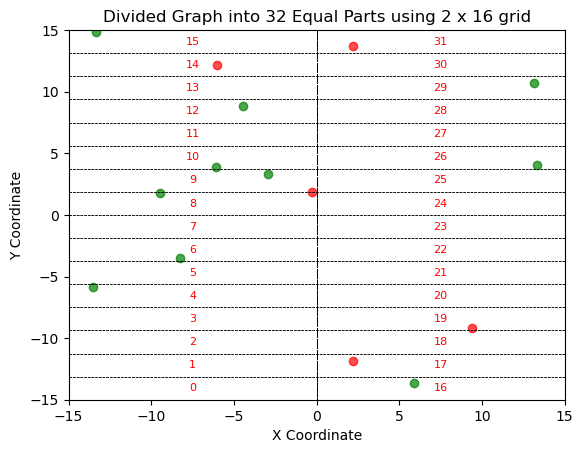

Graph #: 2


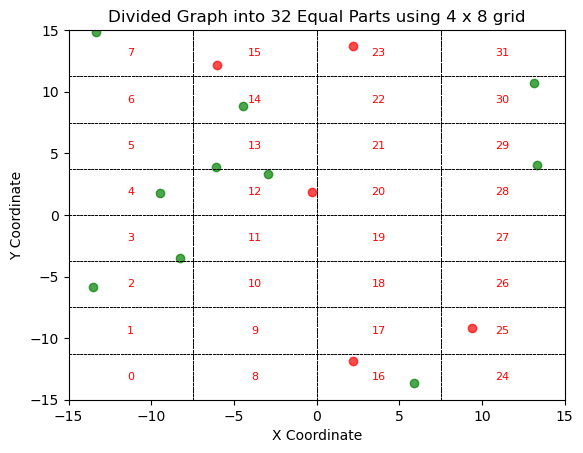

Graph #: 3


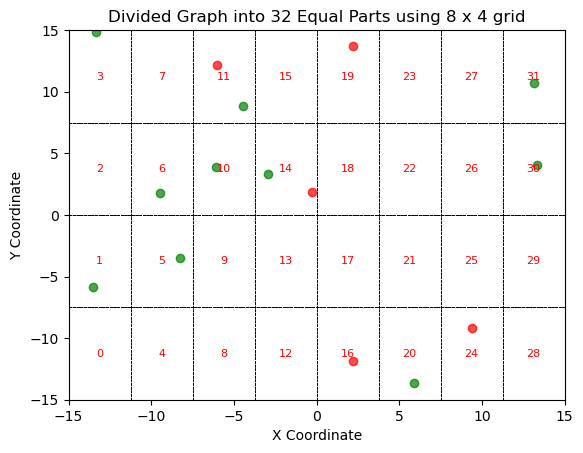

Graph #: 4


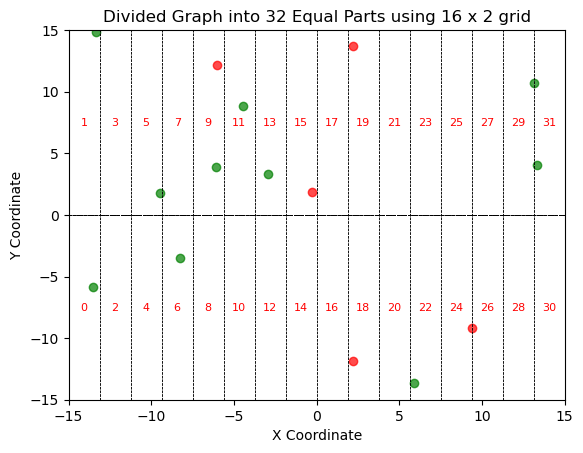

In [55]:
# Example usage:
num_of_qubits_for_one_point = 5
for i in range(1, num_of_qubits_for_one_point):
    divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, i, numbering = True)

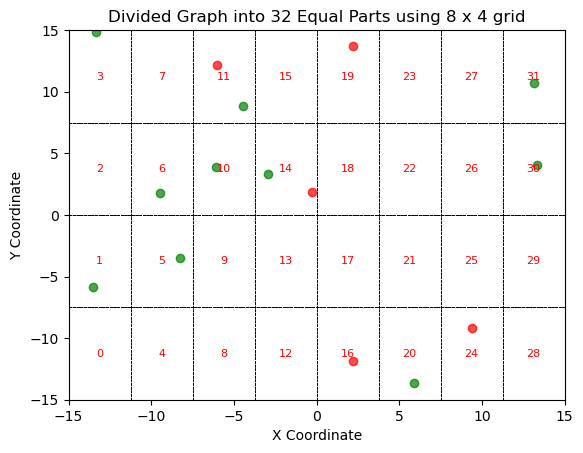

In [56]:
# Select the grid that will give you the best solution
'''
The numbering starts from 1,2,3,..
'''
final_grid = 3

boundaries = {}

boundaries = divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, final_grid, save_grids=True)

In [57]:
# Counting points in each grid
points_counts = count_points_in_grids(existing_charging_points, points_of_interest, boundaries)

# Displaying boundaries and points distribution in a table
display_boundaries_table(boundaries, points_counts)

+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+
| Grid Number | X Start | X End  | Y Start | Y End |         Adjacent Pairs         | Existing Charging Points | Points of Interest |
+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+
|      0      |  -15.0  | -11.25 |  -15.0  |  -7.5 |            1, 4, 5             |            0             |         0          |
|      1      |  -15.0  | -11.25 |   -7.5  |  0.0  |         0, 2, 4, 5, 6          |            0             |         1          |
|      2      |  -15.0  | -11.25 |   0.0   |  7.5  |         1, 3, 5, 6, 7          |            0             |         0          |
|      3      |  -15.0  | -11.25 |   7.5   |  15.0 |            2, 6, 7             |            0             |         1          |
|      4      |  -11.25 |  -7.5  |  -15.0  |  -7.5 |         0

In [58]:
def create_fitness_dict(boundaries_dict, points_counts):
    fitness_dict = {}

    for grid_number, boundary_info in boundaries_dict.items():
        charging_points = points_counts[grid_number]['charging_points']
        points_of_interest = points_counts[grid_number]['points_of_interest']
        adjacent_pairs = ', '.join(map(str, boundary_info.get('adjacent_pairs', [])))

        fitness_dict[grid_number] = {'Adjacent_Pairs': adjacent_pairs, 'Charging Points': charging_points, 'Points of Interest': points_of_interest}

    return fitness_dict

def display_fitness_table(fitness_dict):
    if fitness_dict:
        table = PrettyTable()
        table.field_names = ["Grid Number", "Adjacent Pairs", "Charging Points", "Points of Interest"]

        for grid_number, fitness_info in fitness_dict.items():
            adjacent_pairs = fitness_info['Adjacent_Pairs']
            charging_points = fitness_info['Charging Points']
            points_of_interest = fitness_info['Points of Interest']

            table.add_row([grid_number, adjacent_pairs, charging_points, points_of_interest])

        print(table)
    else:
        print("Summary dictionary is empty.")

In [59]:
# Creating a summary dictionary
fitness_dict = create_fitness_dict(boundaries, points_counts)

# Displaying the summary dictionary in table format
display_fitness_table(fitness_dict)

+-------------+--------------------------------+-----------------+--------------------+
| Grid Number |         Adjacent Pairs         | Charging Points | Points of Interest |
+-------------+--------------------------------+-----------------+--------------------+
|      0      |            1, 4, 5             |        0        |         0          |
|      1      |         0, 2, 4, 5, 6          |        0        |         1          |
|      2      |         1, 3, 5, 6, 7          |        0        |         0          |
|      3      |            2, 6, 7             |        0        |         1          |
|      4      |         0, 1, 5, 8, 9          |        0        |         0          |
|      5      |    0, 1, 2, 4, 6, 8, 9, 10     |        0        |         1          |
|      6      |    1, 2, 3, 5, 7, 9, 10, 11    |        0        |         1          |
|      7      |        2, 3, 6, 10, 11         |        0        |         0          |
|      8      |        4, 5, 9, 